<a href="https://colab.research.google.com/github/rafawaltrick/Pandas/blob/main/identificando_e_Removendo_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [18]:
dados = pd.read_csv('/content/drive/MyDrive/Pandas/Pandas_projetos_estudos/dados_residencial.csv',sep = ';')

# Para conseguir visualizar a imagem, tive que importar a biblioteca 'Open cv2' e para mostrar a imagem, tive que importar a biblioteca cv2_imshow.

In [25]:
import cv2
from google.colab.patches import cv2_imshow

#  Temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente. Teremos o Q1, que se refere ao primeiro quartil e parte em 25% e 75%, já o Q3 parte os dados em 75% e 25%. A diferente entre Q3 e Q1 gera o intervalo interquartirico, isto é, as estatísticas que geraremos para realizar o corte de outliers.

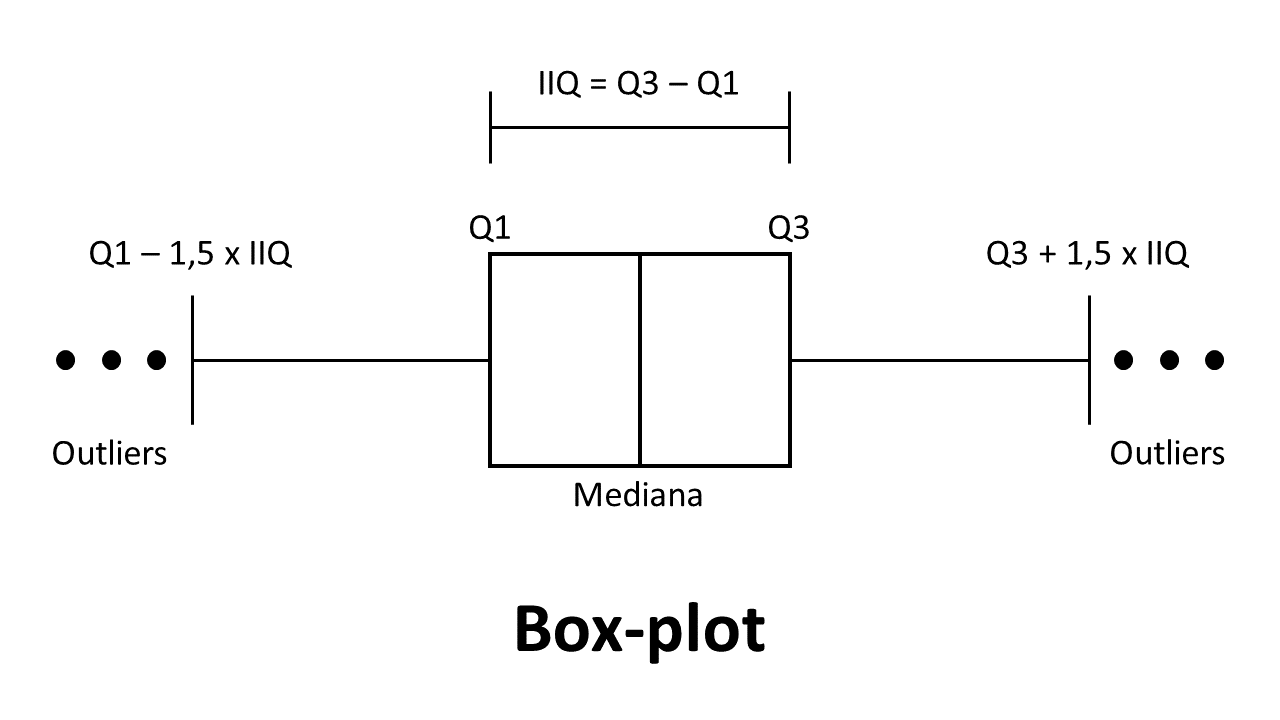

In [28]:
imagem = cv2.imread('/content/drive/MyDrive/Pandas/Pandas_projetos_estudos/box-plot.png')
cv2_imshow(imagem)

<img src = '/content/drive/MyDrive/Pandas/Pandas_projetos_estudos/box-plot.png' width=70%>

# Com o comando'.boxplot( ), trazendo a coluna 'Valor', o gráfico mostra os valores discrepantes, os Outliers.

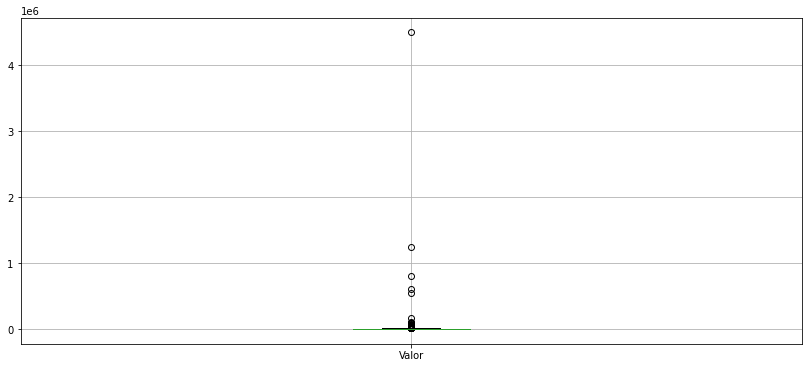

In [19]:
dados.boxplot(['Valor'])

# No comando a baixo, o retorno será dos valores a cima ou iguais a 500000, visto em uma tabela, indicando quais são os valores discrepantes no gráfico a cima.

In [20]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo de Imovel
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


# Aqui foi criado uma variável só com os dados da coluna 'Valor'.

In [24]:
valor = dados['Valor']

In [31]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [32]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

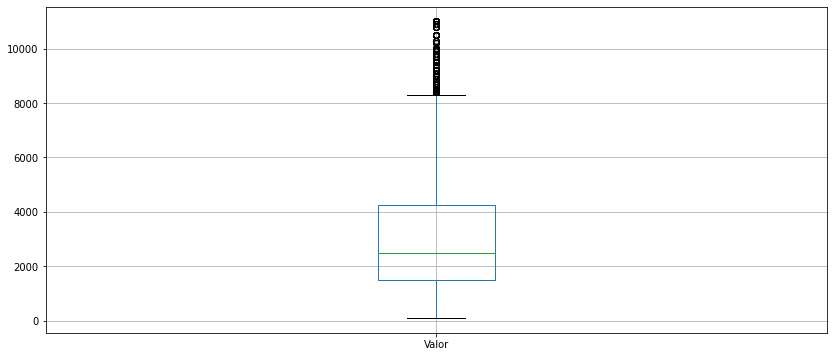

In [33]:
dados_new.boxplot(['Valor'])

# A função '.hist( )' mostra um histograma, a variação de frequências dos dados.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f715cd13520>]],
      dtype=object)

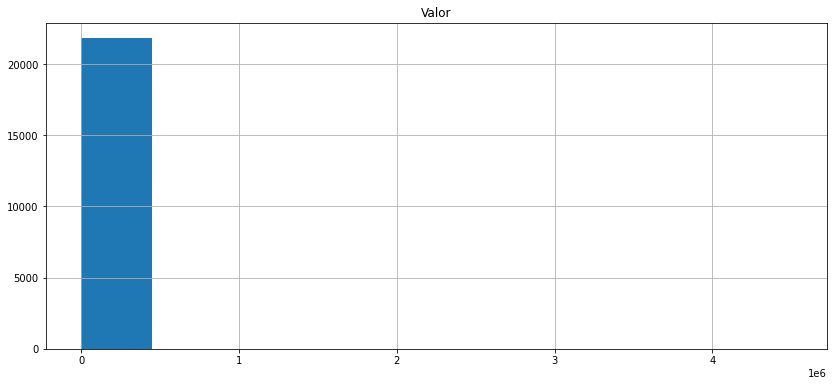

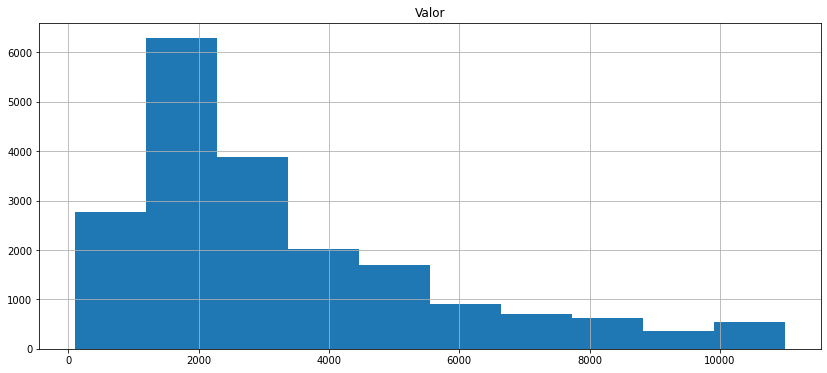

In [34]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

# Identificando e Removendo Outliers

# agora criamos boxplot da coluna valor e separando por grupos, no caso a coluna 'Tipos'.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


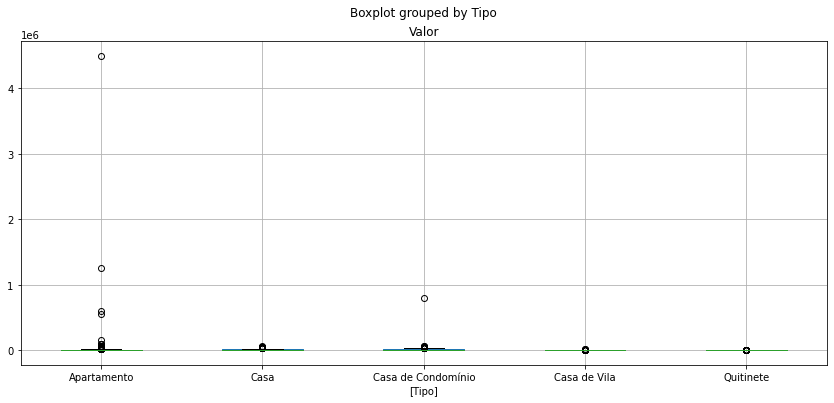

In [35]:
dados.boxplot(['Valor'], by = ['Tipo'])

# Primeiro criamos um grupo com a variável 'Tipo'. Dessa forma foi criado uma DataFrame com todos os valores relacionados a coluna 'Tipo.

In [37]:
grupo_tipo = dados.groupby('Tipo')

# Agora foi criado uma coluna (series) apenas com os valores da coluna 'Valor' relacionado a coluna 'Tipo'.

In [38]:
grupo_tipo = dados.groupby('Tipo')['Valor']

# Podemos visualizar o conteúdo dessa 'series' com o comando '.groups'

In [39]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [40]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [41]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [42]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [43]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [44]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [46]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

# Se quiser acionar visualizar esses valores, basta acrescentar o valor desejado entre colchetes.

In [47]:
limite_superior['Casa']

22850.0

In [48]:
# Criamos uma DataFrame vazia
dados_new = pd.DataFrame()
# Criamos a condição: para cada 'tipo' dentro do 'grupo_tipo', será comparado a chave do dicionário desse grupo. Ver chave - valor a cima.
for tipo in grupo_tipo.groups.keys():
# Criamos a variável que dará valor ao 'tipo'.
  eh_tipo = dados['Tipo'] == tipo
# Criamos a variável que vai limitar os valores a serem usados.
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
# Criamos a variável que faz a seleção usando as duas variáveis criadas a cima.
  selecao = eh_tipo & eh_dentro_limite
# Criamos a dataFrame usando essa seleção.
  dados_selecao = dados[selecao]
# Agora vaomos concatenar essas DataFrames.
  dados_new = pd.concat([dados_new, dados_selecao])        

# Criando um boxplot para visualizar cada um dos 'tipo' que foram criados.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


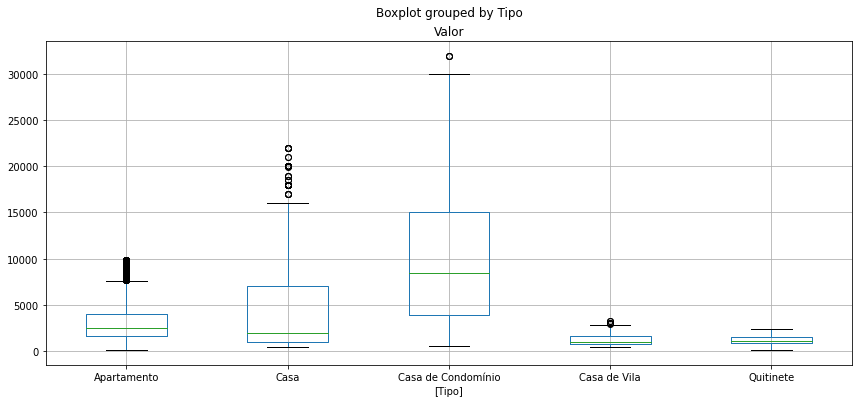

In [49]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [50]:
dados_new.to_csv('/content/drive/MyDrive/Pandas/Pandas_projetos_estudos/dados_residencial_sem_outliers.csv', sep = ';', index = False)